In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data from the Excel file
finance_records = pd.read_excel('2024-03-23.xlsx')

# Filter out transfer transactions and the "Modified Bal." category
finance_records = finance_records[~finance_records['Income/Expense'].str.contains('Transfer')]
finance_records = finance_records[finance_records['Category'] != 'Modified Bal.']

# Extract the year from the 'Period' column
finance_records['Year'] = finance_records['Period'].dt.year
finance_records['Month'] = finance_records['Period'].dt.month

# Separate income and expenses
income_records = finance_records[finance_records['Income/Expense'] == 'Income']
expense_records = finance_records[finance_records['Income/Expense'] == 'Exp.']


ModuleNotFoundError: No module named 'pandas'

In [2]:
# Calculate monthly totals
monthly_expense_totals = expense_records.groupby(['Year', 'Month'])['Amount'].sum().reset_index()
monthly_income_totals = income_records.groupby(['Year', 'Month'])['Amount'].sum().reset_index()

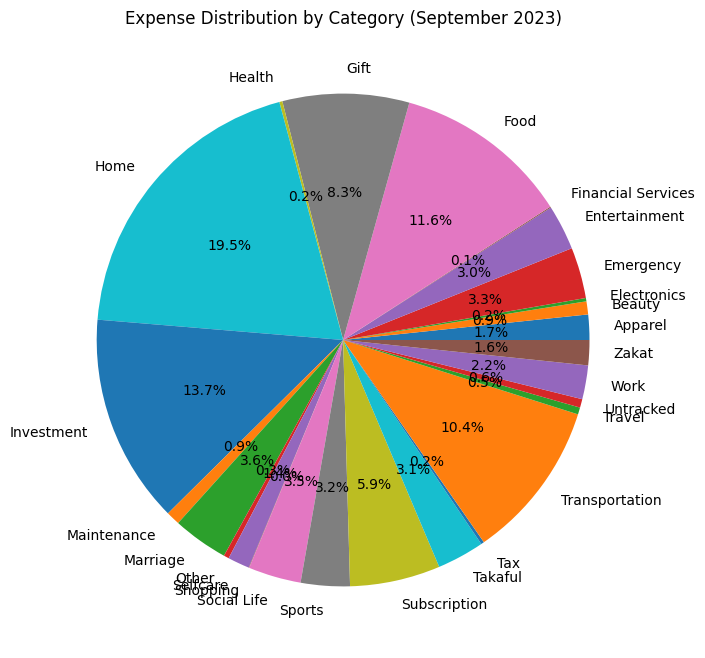

In [3]:
# Plot Expense Distribution by Category (for the most recent month)
recent_month_expenses = expense_records[expense_records['Year'] == 2023].groupby('Category')['Amount'].sum()
plt.figure(figsize=(8, 8))
plt.pie(recent_month_expenses, labels=recent_month_expenses.index, autopct='%1.1f%%')
plt.title('Expense Distribution by Category (September 2023)')
plt.show()

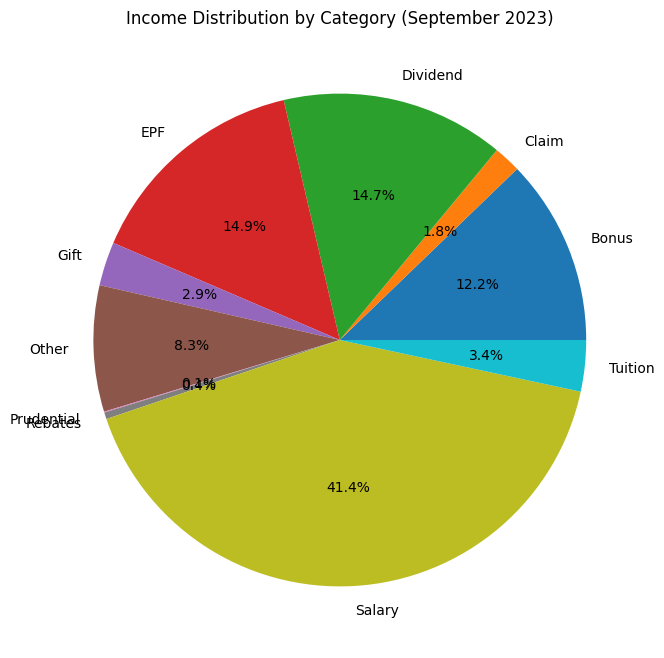

In [4]:
# Plot Income Distribution by Category (for the most recent month)
recent_month_income = income_records[income_records['Year'] == 2023].groupby('Category')['Amount'].sum()
plt.figure(figsize=(8, 8))
plt.pie(recent_month_income, labels=recent_month_income.index, autopct='%1.1f%%')
plt.title('Income Distribution by Category (September 2023)')
plt.show()

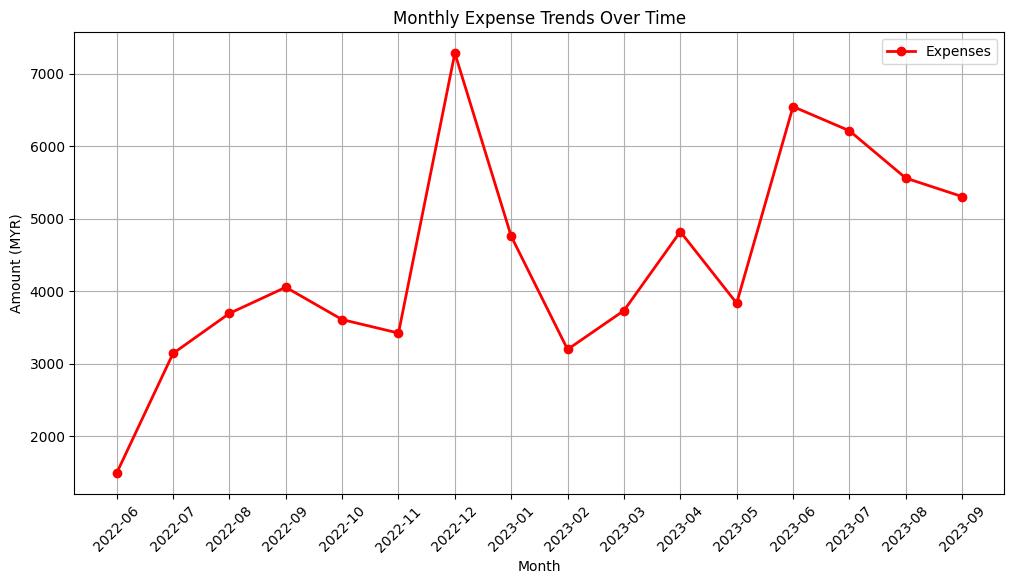

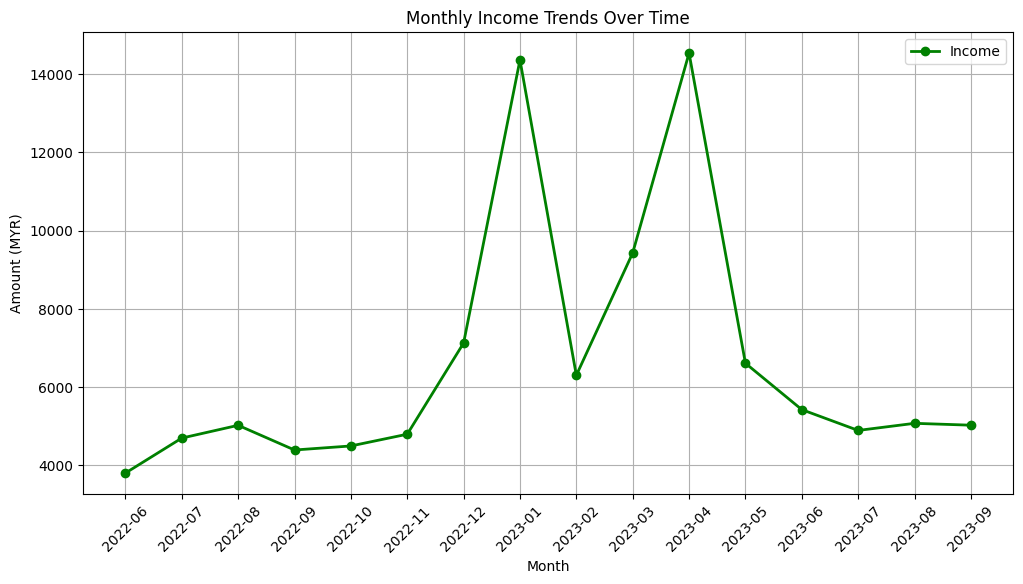

In [10]:
# Sort the monthly totals by month
monthly_expense_totals = monthly_expense_totals.sort_values(by=['Year', 'Month'])
monthly_income_totals = monthly_income_totals.sort_values(by=['Year', 'Month'])

# Plot Monthly Expense Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(monthly_expense_totals.index, monthly_expense_totals['Amount'], marker='o', label='Expenses', color='red', linestyle='-', linewidth=2)
plt.title('Monthly Expense Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Amount (MYR)')
plt.xticks(monthly_expense_totals.index, [f'{year}-{month:02}' for year, month in zip(monthly_expense_totals['Year'], monthly_expense_totals['Month'])], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plot Monthly Income Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(monthly_income_totals.index, monthly_income_totals['Amount'], marker='o', label='Income', color='green', linestyle='-', linewidth=2)
plt.title('Monthly Income Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Amount (MYR)')
plt.xticks(monthly_income_totals.index, [f'{year}-{month:02}' for year, month in zip(monthly_income_totals['Year'], monthly_income_totals['Month'])], rotation=45)
plt.legend()
plt.grid(True)
plt.show()


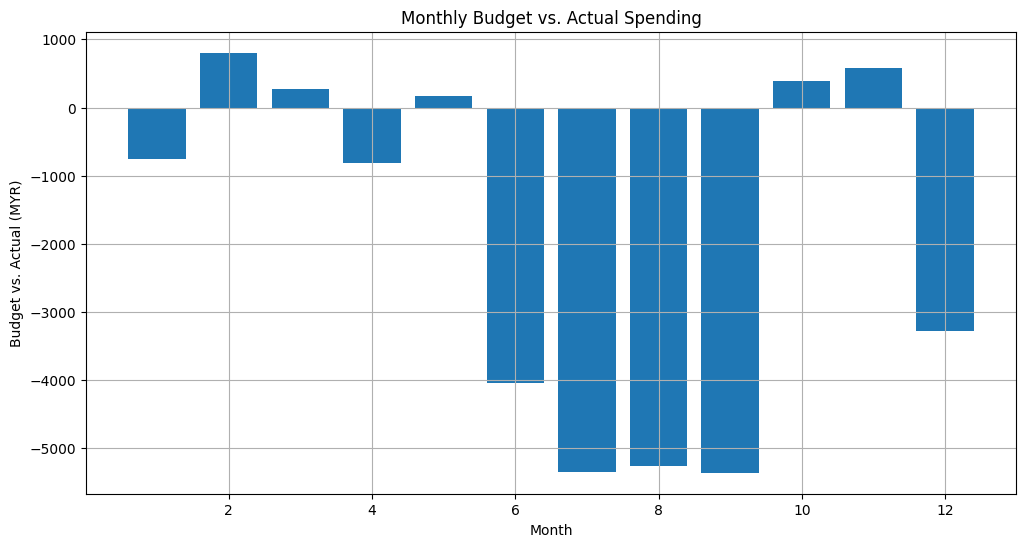

In [9]:
# Calculate Monthly Budget vs. Actual Spending (assuming you have a budget)
monthly_budget = 4000  # Replace with your actual budget for each month
monthly_actual_expenses = monthly_expense_totals.groupby('Month')['Amount'].sum()
budget_vs_actual = monthly_budget - monthly_actual_expenses
plt.figure(figsize=(12, 6))
plt.bar(budget_vs_actual.index, budget_vs_actual)
plt.title('Monthly Budget vs. Actual Spending')
plt.xlabel('Month')
plt.ylabel('Budget vs. Actual (MYR)')
plt.grid(True)
plt.show()

In [8]:
# Top Expense Subcategories (for the most recent month)
recent_month_expense_subcategories = expense_records[expense_records['Year'] == 2023].groupby('Subcategory')['Amount'].sum().nlargest(3)
print('\nTop 3 Expense Subcategories (September 2023):')
print(recent_month_expense_subcategories)

# Calculate Expense vs. Income Ratio (for the most recent month)
recent_month_total_income = monthly_income_totals[monthly_income_totals['Year'] == 2023]['Amount'].sum()
recent_month_total_expenses = monthly_expense_totals[monthly_expense_totals['Year'] == 2023]['Amount'].sum()
expense_income_ratio = recent_month_total_expenses / recent_month_total_income
print(f'\nExpense vs. Income Ratio (September 2023): {expense_income_ratio:.2f}')

# Top Merchants or Accounts
top_merchants = finance_records[finance_records['Income/Expense'] == 'Exp.'].groupby('Accounts')['Amount'].sum().nlargest(3)
print('\nTop 3 Expense Merchants/Accounts:')
print(top_merchants)

# Calculate Savings Rate (for the most recent month)
savings_rate = (recent_month_total_income - recent_month_total_expenses) / recent_month_total_income
print(f'\nSavings Rate (September 2023): {savings_rate:.2%}')


Top 3 Expense Subcategories (September 2023):
Subcategory
Interest    6039.00
Rental      5263.30
Petrol      2579.87
Name: Amount, dtype: float64

Expense vs. Income Ratio (September 2023): 0.61

Top 3 Expense Merchants/Accounts:
Accounts
Maybank PSA-i     25238.78
Maybank Ikhwan    21875.68
ASB Financing      9551.69
Name: Amount, dtype: float64

Savings Rate (September 2023): 38.64%
